<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Flower Recognition</p>


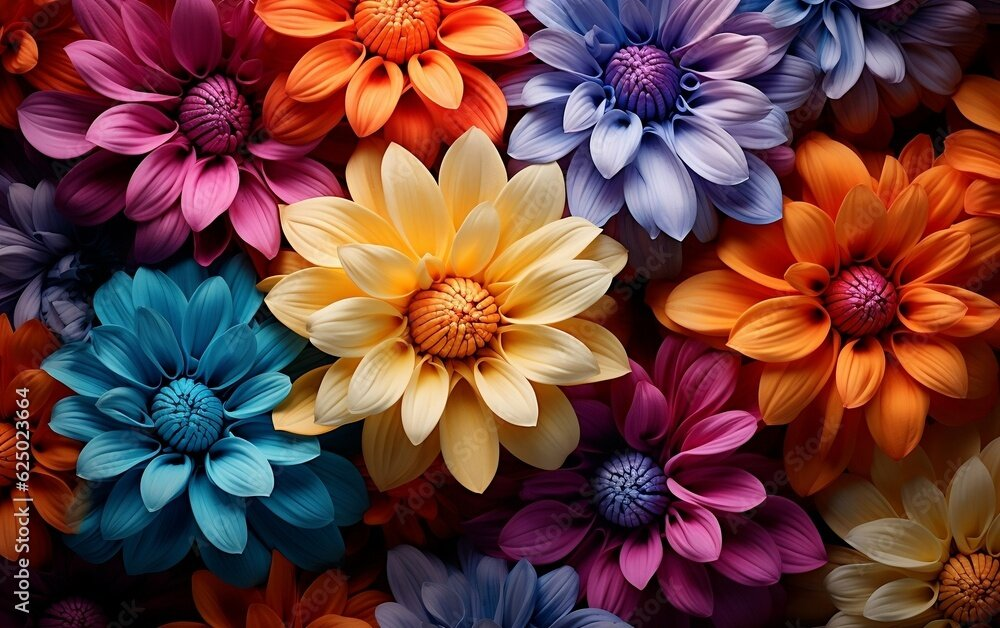

<p style="font-family: 'Brush Script MT', cursive; font-size: 40px; text-align: center; color: #4682B4;">Author: Muhammad Furqan</p>


  [![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/iammuhammadfurqan)

  [![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadfurqan0)

  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadfurqan/)

  [![Gmail](https://img.shields.io/badge/Gmail-Contact%20Me-red?style=for-the-badge&logo=gmail)](mailto:sheikhfurqan048@gmail.com)

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Importing the Libraries</p>


In [3]:
import pandas as pd
import numpy as np
from torchvision.datasets import ImageFolder
import os
import plotly.graph_objects as go
import torchvision.transforms as tt
import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch.nn.functional as F
import torch
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import DataLoader


<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Load Dataset</p>


In [4]:
data_dir = "/kaggle/input/flowers"

dataset = ImageFolder(data_dir)
len(dataset)

1269

In [5]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=262x193>, 0)

In [6]:
dataset.classes

['gaenari', 'rose', 'sakura']

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Visualizing the Classes</p>


In [7]:

# Initialize a dictionary to store the count of images in each class
class_count = {}

# Iterate over the directories in the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Count the number of files in the directory (assuming each file is an image)
        num_images = len(os.listdir(class_dir))
        # Store the count for this class
        class_count[class_name] = num_images

# Sort classes by image count in ascending order
sorted_classes = sorted(class_count.items(), key=lambda x: x[1])

# Extract class names and image counts
class_names = [item[0] for item in sorted_classes]
image_counts = [item[1] for item in sorted_classes]

# Define custom colors for each bar
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=image_counts,
    y=class_names,
    orientation='h',
    marker_color=colors
)])

# Customize layout
fig.update_layout(
    title='Number of Images in Each Class',
    xaxis_title='Number of Images',
    yaxis_title='Class',
    yaxis=dict(autorange="reversed"),  # Invert y-axis to have the class with the highest count at the top
)

# Show plot
fig.show()


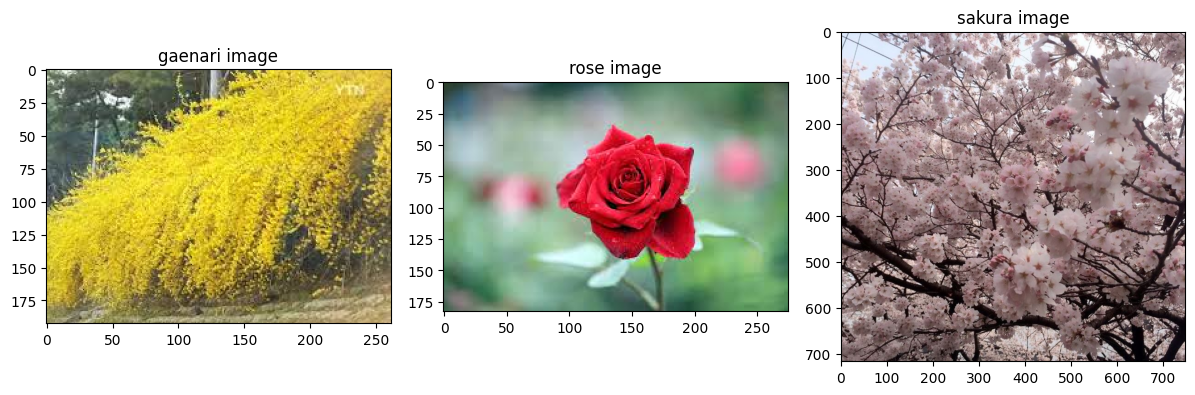

In [10]:
# Define the list of image locations
images = [
    '/kaggle/input/flowers/gaenari/������_0.jpg',
    '/kaggle/input/flowers/rose/���_0.jpg',
    '/kaggle/input/flowers/sakura/03a67d68c9520b8aa199c32bbef469aa.jpg'
]

# Define the list of classes
classes = ['gaenari', 'rose', 'sakura']

# Modify the disease names to include 'image'
classes = [clss + ' image' for clss in classes]

# Set up the plot
plt.figure(figsize=(20, 10))
columns = 5

# Plot the images
for i, image_loc in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    image = plt.imread(image_loc)
    plt.title(classes[i])
    plt.imshow(image)

plt.tight_layout()
plt.show()


<p style="font-family: 'Brush Script MT', cursive; font-size: 100px; text-align: center; color: #4682B4;">Image Resizing</p>


In [13]:
dataset = ImageFolder(data_dir, tt.Compose([tt.Resize(224), tt.RandomCrop(224), tt.ToTensor()]))

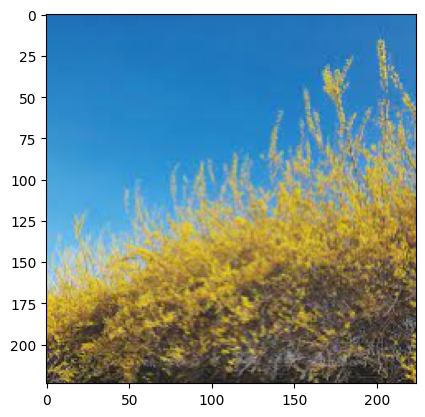

In [14]:
img, label = dataset[120]
plt.imshow(img.permute(1,2,0))

<p style="font-family: 'Brush Script MT', cursive; font-size: 100px; text-align: center; color: #4682B4;">Train / Test Split</p>


In [15]:
val_pct = 0.1
val_size = int(val_pct * len(dataset))

train_size = len(dataset) - val_size

print("The Number of Images in Training Set is: ",train_size)
print("The Number of Images in Training Set is: ",val_size)

The Number of Images in Training Set is:  1143
The Number of Images in Training Set is:  126


In [16]:

train_ds, valid_ds = random_split(dataset, [train_size, val_size])

len(train_ds), len(valid_ds)

(1143, 126)

In [17]:
batch_size = 64

train_dl = DataLoader(train_ds, 
                     batch_size, 
                     shuffle= True,
                     num_workers = 4,
                      pin_memory = True
                     )

val_dl = DataLoader(valid_ds, 
                     batch_size, 
                     shuffle= True,
                     num_workers = 4,
                      pin_memory = True
                     )

In [18]:

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

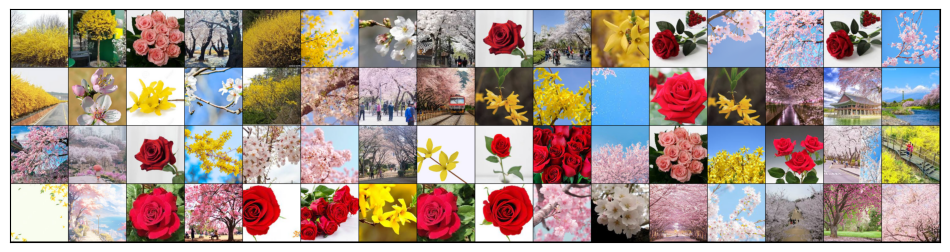

In [19]:
show_batch(train_dl)

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Getting Device Information</p>


## Introduction to Code Explanation

This code is designed to help move data efficiently between a computer's central processing unit (CPU) and its graphics processing unit (GPU), leveraging the computational power of the GPU when available. We'll break down the code into smaller sections and explain each part in simple terms.

### Part 1: `get_default_device()`

This part of the code determines whether a GPU (Graphics Processing Unit) is available for use. If it is, the function returns the GPU device; otherwise, it returns the CPU (Central Processing Unit) device.

**Example:**

```python
device = get_default_device()
print(device)  # Output will be 'cuda' if GPU is available, else 'cpu'
```
### Part 2: `to_device(data, device)`
This function is used to move data to the chosen device (either CPU or GPU). It handles both single tensors and lists/tuples of tensors. If the data is a list or tuple, it recursively moves each tensor to the specified device.

**Example:**

> tensor = torch.tensor([1, 2, 3]) \
> device = get_default_device()\
> tensor_on_device = to_device(tensor, device)\
> print(tensor_on_device.device)  # Output will be 'cuda' or 'cpu' depending on device availability

### Part 3: `DeviceDataLoader`
This class wraps around a typical data loader (such as those used in machine learning tasks) and ensures that each batch of data obtained from the loader is moved to the specified device.

Example usage in PyTorch:
> train_dl = DeviceDataLoader(train_loader, device)


This class has two main methods:

__iter__(self)
This method allows the class to be iterable. It iterates through the batches of data from the wrapped data loader (dl), moves each batch to the specified device, and yields the batches one by one.

__len__(self)
This method returns the total number of batches in the wrapped data loader (dl). It's used, for instance, to determine the total number of iterations in an epoch during training.

**Example:**
> print(len(train_dl))


In [20]:

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [21]:
torch.cuda.is_available()

True

In [22]:
device = get_default_device()

In [23]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Base Model</p>


## Explanation of ImageClassificationBase

This code defines a base class for image classification tasks. It contains methods for training and evaluating a neural network model for image classification.

### `training_step(self, batch)`

This method is responsible for calculating the loss for a batch of training data. It takes a batch of images and their corresponding labels as input. The model generates predictions for the images, computes the loss using cross-entropy, and returns the loss.

### `validation_step(self, batch)`

This method calculates both loss and accuracy for a batch of validation data. Similar to `training_step`, it takes a batch of images and labels, generates predictions using the model, calculates the loss, and additionally computes the accuracy of the predictions.

### `validation_epoch_end(self, outputs)`

After running validation on all batches of data for an epoch, this method is called to combine the losses and accuracies of all batches and compute the average loss and accuracy for the entire validation set.

### `epoch_end(self, epoch, result)`

At the end of each epoch, this method prints a summary of the training and validation metrics, including the epoch number, training loss, validation loss, and validation accuracy.

### `accuracy(outputs, labels)`

This is a helper function used within the class to calculate accuracy. It takes predicted outputs and true labels as input, determines the predicted classes, compares them with the true labels, and returns the accuracy.



In [24]:

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        "calculate loss for a batch of training data"
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        "calculate loss & accuracy for a batch of validation data"
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

## Explanation of Evaluation and Training Functions

This code defines two important functions for training and evaluating a neural network model: `evaluate` and `fit`.

### `evaluate(model, val_loader)`

This function evaluates the model's performance on the validation set. It takes the model and the validation data loader as inputs. Within this function:

1. The model is set to evaluation mode using `model.eval()`. This mode disables certain operations like dropout.
2. The function iterates through the validation data loader, computes validation metrics for each batch using `model.validation_step`, and collects the outputs.
3. Finally, it combines the metrics from all batches using `model.validation_epoch_end` to produce overall validation metrics.

### `fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD)`

This function is responsible for training the model. It takes the number of epochs, learning rate, model architecture, training data loader, validation data loader, and an optional optimizer function as inputs. Within this function:

1. An optimizer is initialized using the provided optimizer function (`opt_func`) and the model parameters.
2. The training loop runs for the specified number of epochs.
3. Within each epoch:
    - The model is set to training mode using `model.train()`.
    - It iterates through the training data loader, computes training loss for each batch using `model.training_step`, performs backpropagation, and updates the model parameters.
    - After each epoch, it evaluates the model on the validation set using the `evaluate` function.
    - It also computes the average training loss for the epoch and passes all metrics to `model.epoch_end` for printing the epoch summary.
4. The function returns a history of metrics collected during training.

**Example Usage:**

Suppose you have a model `model` and data loaders `train_loader` and `val_loader`. You can train the model using the `fit` function as follows:

```python
history = fit(5, 0.001, model, train_loader, val_loader)


In [25]:
@torch.no_grad()
def evaluate(model, val_loader):
    """Evaluates the model's performance on the validation set"""
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">ResNet Model</p>


## Description of ResNet9 Model Architecture

This code defines a simplified version of the ResNet architecture called ResNet9 for image classification tasks. Let's break down the components:

### Convolutional Block (`conv_block`)

This function creates a convolutional block consisting of a convolutional layer, batch normalization, and ReLU activation. Optionally, it includes a max-pooling layer if `pool=True`.

### ResNet9 Class

This class inherits from `ImageClassificationBase`, implying it's meant for image classification tasks. It consists of several convolutional layers, residual connections, and a classifier.

#### Initialization (`__init__`)

- The constructor initializes the layers of the ResNet9 model.
- It sets up the initial convolutional layers (`conv1` and `conv2`).
- It defines two residual blocks (`res1` and `res2`) each comprising two convolutional layers.
- The classifier consists of adaptive max-pooling, flattening, dropout, and a fully connected layer to output class probabilities.

#### Forward Pass (`forward`)

- Input images are resized to 64x64 pixels.
- The input passes through the initial convolutional layers (`conv1` and `conv2`).
- Residual connections are applied (`res1` and `res2`), where the input is added to the output of each residual block.
- The output passes through the classifier to generate predictions.

### Example Usage:

Suppose we have input tensor `xb` representing a batch of images with shape (batch_size, channels, height, width). We can instantiate and use the ResNet9 model as follows:

```python
model = ResNet9(in_channels=3, num_classes=10)  # Assuming 3 input channels (e.g., RGB) and 10 output classes
predictions = model(xb)  # Forward pass: obtain predictions for the batch xb


In [26]:
import torch.nn as nn
import torch.nn.functional as F

def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # Input: 128 x 3 x 64 x 64
        self.conv1 = conv_block(in_channels, 64) # 128 x 64 x 64 x 64
        self.conv2 = conv_block(64, 128, pool=True) # 128 x 128 x 32 x 32
        self.res1 = nn.Sequential(conv_block(128, 128), # 128 x 128 x 32 x 32
                                  conv_block(128, 128)) # 128 x 128 x 32 x 32
        
        self.conv3 = conv_block(128, 256, pool=True) # 128 x 256 x 16 x 16
        self.conv4 = conv_block(256, 512, pool=True) # 128 x 512 x 8 x 8 
        self.res2 = nn.Sequential(conv_block(512, 512), # 128 x 512 x 8 x 8 
                                  conv_block(512, 512)) # 128 x 512 x 8 x 8 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), # 128 x 512 x 1 x 1 
                                        nn.Flatten(), # 128 x 512
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        # Resize the input images to 64x64
        xb = F.interpolate(xb, size=(64, 64), mode='bilinear', align_corners=False)
        
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out


In [27]:
model = to_device(ResNet9(3, len(dataset.classes)), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [29]:
torch.cuda.empty_cache()


In [30]:
for batch in train_dl:
    images, labels = batch
    print('images.shape', images.shape)
    print('images.device', images.device)
    preds = model(images)
    print('preds.shape', preds.shape)
    break

images.shape torch.Size([64, 3, 224, 224])
images.device cuda:0
preds.shape torch.Size([64, 3])


<p style="font-family: 'Brush Script MT', cursive; font-size: 80px; text-align: center; color: #4682B4;">Evaluation and Prediction</p>


## Explanation of Training with Different Configurations

This code demonstrates training a neural network model with different configurations such as varying numbers of epochs, learning rates, and optimizers. Let's break it down in simple terms:

### Configuration Lists

- `epoch_list`: This list contains the number of epochs for each training iteration. Each element represents how many times the model will see the entire training dataset during training.
- `lr_list`: This list contains the learning rates corresponding to each training iteration. Learning rate determines the step size taken during optimization.
- `optimizer_list`: This list contains the optimizer classes (e.g., Adam, SGD) to be used for each training iteration. The optimizer adjusts the model parameters based on the computed gradients.

### Training Loop

The code iterates through these configuration lists using the `zip` function, which pairs corresponding elements from multiple lists. Within each iteration:

1. It selects the number of epochs, learning rate, and optimizer class from the lists.
2. It calls the `fit` function, passing these parameters along with the model and data loaders.
3. The `fit` function trains the model according to the specified configuration and returns a history of training metrics.
4. The history from each iteration is concatenated into a single list (`history`).

### Example Usage:

Suppose we have lists of different epoch numbers, learning rates, and optimizers:

```python
epoch_list = [5, 5, 10, 10]
lr_list = [0.001, 0.0001, 0.0001, 0.00001]
optimizer_list = [torch.optim.Adam, torch.optim.Adam, torch.optim.SGD, torch.optim.SGD]

history = []

for epochs, lr, optimizer_cls in zip(epoch_list, lr_list, optimizer_list):
    history += fit(epochs, lr, model, train_dl, valid_dl, optimizer_cls)


In [31]:
epoch_list = [5, 5, 10, 10]  # List of different numbers of epochs for each training iteration
lr_list = [0.001, 0.0001, 0.0001, 0.00001]  # List of different learning rates for each training iteration
optimizer_list = [torch.optim.Adam, torch.optim.Adam, torch.optim.SGD, torch.optim.SGD]  # List of different optimizers for each training iteration

history = []

for epochs, lr, optimizer_cls in zip(epoch_list, lr_list, optimizer_list):
    history += fit(epochs, lr, model, train_dl, valid_dl, optimizer_cls)

# Print or use history for further analysis
print(history)


Epoch [0], train_loss: 0.4735, val_loss: 1.2733, val_acc: 0.7850
Epoch [1], train_loss: 0.0884, val_loss: 0.2058, val_acc: 0.9761
Epoch [2], train_loss: 0.0759, val_loss: 0.2080, val_acc: 0.9607
Epoch [3], train_loss: 0.0893, val_loss: 0.0712, val_acc: 0.9685
Epoch [4], train_loss: 0.0693, val_loss: 0.0847, val_acc: 0.9680
Epoch [0], train_loss: 0.0584, val_loss: 0.0415, val_acc: 0.9841
Epoch [1], train_loss: 0.0572, val_loss: 0.0459, val_acc: 0.9761
Epoch [2], train_loss: 0.0372, val_loss: 0.0447, val_acc: 0.9761
Epoch [3], train_loss: 0.0370, val_loss: 0.0584, val_acc: 0.9761
Epoch [4], train_loss: 0.0169, val_loss: 0.0276, val_acc: 0.9844
Epoch [0], train_loss: 0.0184, val_loss: 0.0367, val_acc: 0.9766
Epoch [1], train_loss: 0.0132, val_loss: 0.0189, val_acc: 1.0000
Epoch [2], train_loss: 0.0216, val_loss: 0.0196, val_acc: 0.9919
Epoch [3], train_loss: 0.0154, val_loss: 0.0218, val_acc: 0.9919
Epoch [4], train_loss: 0.0141, val_loss: 0.0183, val_acc: 0.9922
Epoch [5], train_loss: 0.

In [32]:
import plotly.graph_objects as go

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    epochs = list(range(1, len(accuracies) + 1))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=epochs, y=accuracies, mode='lines+markers'))
    fig.update_layout(
        xaxis_title='Epoch',
        yaxis_title='Accuracy',
        title='Accuracy vs. No. of Epochs'
    )
    fig.show()


In [33]:
plot_accuracies(history)

In [34]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [35]:
def predict_image(img, model, classes):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return classes[preds[0].item()]

In [36]:
def show_image_prediction(img, label):
    plt.imshow(img.permute((1, 2, 0)))
    pred = predict_image(img, model, dataset.classes)
    print('Target:', dataset.classes[label])
    print('Prediction:', pred)

Target: sakura
Prediction: sakura


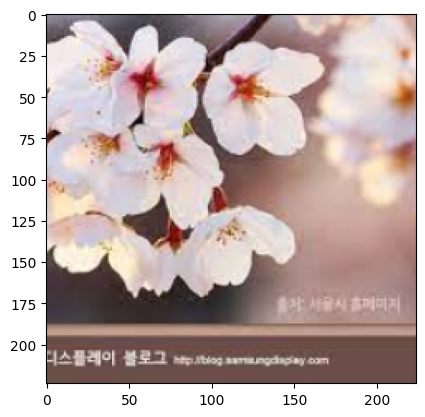

In [37]:
show_image_prediction(*valid_ds[100])

Target: gaenari
Prediction: gaenari


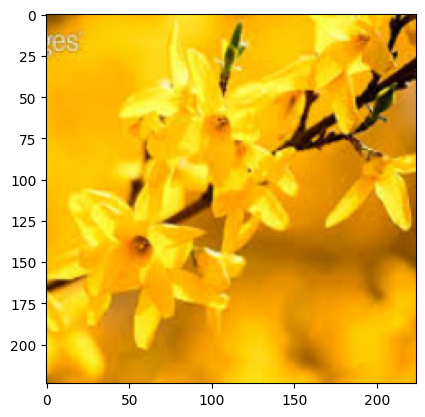

In [39]:
show_image_prediction(*valid_ds[10])

In [43]:
# 파일에 히스토리 저장
history_path = "/kaggle/working/history.pkl"
with open(history_path, 'wb') as file:
    pickle.dump(history, file)